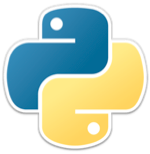


# Python Coding Club

This series is to introduce Python as a programming language to be used for data analysis, scientific computing and plotting. It is by __no means comprehensive__ but will provide a basis for further investigation and exploration into this powerful language. These notes are __best visualised__ in a __Jupyter Notebook__ and I encourage you to __follow along__ in your __preferred IDE__.

# Part 6: Libraries and Modules

Part 6 of this series will be the final part in the base series, aimed at introducing what a Python package/module is, how to make one and how to import and use well made ones already.

Then finally we will conclude by looking at a few well known and highly used packages for Python, what they can be used for and how to use some of their functionality. 

## Part 6.1 Introducing modules

**Modules** in Python are simply files that end with the script `.py`. Any Python file can be used as a module and **imported** into another file via the `import` statement so long as the file resides in your `sys.path`. 

`sys.path` is simply a list of directories that Python searches for when importing files. This can be altered in your IDE preferences, but by default the directory where your current `.py` file is considered. So long as your modules are saved in the same directory for the time being there will be no problem.

For instance if I have some functions that I would like to use in a main program but would rather they did not clutter up my main program, I can save them in a seperate file ending in `.py` and then use an `import` statement to import them.

For this part, there is not a huge amount of code I can write in this notebook to demonstrate these principles, you may have to experiment yourself with saving a `.py` file and trying to access the contents using these instructions. 

To read more about package and module semantics, [here is a helpful guide](https://chrisyeh96.github.io/2017/08/08/definitive-guide-python-imports.html).

### Terminology

For clarification, here is some terminology for this section:

- **module** - a module is a file with the `.py` extension. The **name** of the module is the file name.  
- **built-in module** - this is a module that comes with the installation of Python, such as the `math` or `sys` modules, these are written in C and thus do not have `.py` extensions, but can still be imported. 
- **package** - a package is a folder. Typically a package will contain **modules**. The package name is the name of the folder. 

### Importing modules and packages

Once you have a file with a `.py` extension in the same directory as your current Python file, you can import the contents of that file in using an `import` statement. 

In [1]:
import math

print(math)

<module 'math' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/lib-dynload/math.cpython-38-darwin.so'>


For instance here we import the **built-in** `math` module.

Printing the **name** `math` then shows it is a module called `math` and where it is located.

Similarly we can see that `math` is a module by using `type(math)`

In [2]:
print(type(math))

<class 'module'>


In [3]:
print(type(type))

<class 'type'>


You can access items from the module using the familiar **dot notation** we introduced in the last part. 

In [4]:
print(math.e)
print(math.sin(math.pi/2))

2.718281828459045
1.0


Here we use both `math.e` to access the `e` variable from the `math` module, similar to how we accessed class attributes in Part 5. 

We also access a function in the `math` module by typing `math.sin()` with `math.pi/2` as the argument. 

Similarly classes can be accessed in the same way by utilising:
`<module_name>.<class_name>`.

You can also import specific items from a module using the `from` keyword.

In [5]:
from math import sin, cos, tan, sqrt

x = 0.5
print(sin(x))
print(cos(x))
print(tan(x))
print(sqrt(x))

0.479425538604203
0.8775825618903728
0.5463024898437905
0.7071067811865476


Here we have used `from` to import specific contents from the module only, which enables us to access the functions as if they are defined inside our main program by just typing the names on their own (`sin`, `cos` etc). 

Trying to do this with other members of the `math` module that we have not explicitly imported in this way will not work.

In [6]:
print(pi)

NameError: name 'pi' is not defined

In [7]:
from math import pi

print(pi)

3.141592653589793


If you want to import everything from a module into your program without having to use the `<module_name>.<object_name>` notation, you can use the splat operator `*`.

In [8]:
from math import *

print(e)

2.718281828459045


This can be useful, but should be used with caution especially if you do not know all the contents of the module, otherwise you may accidentally access a variable from the module without meaning to, or be unable to access the modules use if you override the variable name. 

In [9]:
sin = 8

print(sin(x))

TypeError: 'int' object is not callable

In [10]:
print(cos(x))

0.8775825618903728


Here we have explicitly overwritten the `sin` function from `math` since we imported all the functions from `math` using `*`. Also importing in this way just clutters what Python has to handle during runtime as it is then having to generate these extra variables that never get used.

You can also **alias** different modules or packages or even objects in Python by using the `as` keyword in the import statement. 

In [11]:
from math import sin as s

print(s(x))

0.479425538604203


This changes the reference for the `sin` function to `s` in this program, therefore `sin` will be undefined and `s` is now the **name** of the function in this program. 

This can also be done with modules.

In [12]:
import math as m

print(m.sin(x))

0.479425538604203


### Python standard library

Alongside the `math` and `sys` modules, Python has an extensive list of different modules that come with the installation of Python. This list of modules is referred to as the Python standard library.

The full list of modules, including what they are for and how to use them, can be [found here](https://docs.python.org/3/library/).

### Importing your own modules

When importing your own modules, these same rules apply. However, when Python imports the module, it runs all the code in that file (to load the function definitions etc) and therefore if there is any lines of code outside function definitions, such as function calls or variable assignments or `print()` calls, these will execute as well. 

There is a way around this however! This means that you can both use a Python file as a module **and** be able to run code from that file seperately without it running when the module is imported. 

To do this, you need to type the code you **do not want to execute** when the file is imported underneath a line which reads:

> `if __name__ == '__main__':`

This line is a normal `if` statement which checks if the **name** of the executing script(`__name__`) is equal to `'__main__'` or not. When a Python file is running itself as the main program, it is designated the `__name__` of `'__main__'`.

When importing a module, say, `math`, the `__name__` of the module is the filename. Therefore inside the module the `__name__` is not equal to `'__main__'` and the code under the `if` statement is not executed. On the contrary, if you execute the file directly, the `__name__` of your module is set to `'__main__'` and the code **is** executed. 

This allows you to use a Python file both as an importable module **and** as a standalone program. This is particularly useful if you want to make sure the functions etc in the module work correctly, or to simply have this module do something different, but still want to be able to access the functions from another file.

To illustrate this:

In [13]:
print(math.__name__)

math


As you can see, since the `math` module has been imported, the `__name__` attribute of the file has been set to `math`. 

In [14]:
print(__name__)

__main__


Without supplying the a module name, the `__name__` method takes the file as the argument and simply returns `'__main__'`.

In [15]:
print(m.__name__)

math


Since we have also imported the module `math` as `m`, `m` also has the `__name__` of `math`. 

This helps seperate out tests of your code to make sure it works from other sections. 

## Part 6.2: External libraries

External libraries are really where Python shines. The number of open source libraries to utilise that are well supported and highly optimised is astounding. 

When importing libraries however it is worth reading some of the documentation first. Libraries that are not **built-in** will first have to be installed to your machine (think of this as downloading the **module scripts** for your machine to use). 

To achieve this will depend on whether you are using an IDE or Anaconda or some other form of Python. If you are using PyCharm for instance, you can go to:

`PyCharm --> Preferences --> Project -- > Project Interpreter` and clicking on the `+` button. 

This will show a list of Python packages available to install. You can choose where you end up installing them by changing the Python interpreter to a valid location (if you have more than one). 

When you want to install the package, simply press Install Package and the installation will start. 

Alternatively, you can run a command line command from either the command prompt (windows) or Terminal (macOS) by typing `pip install <module_name>`.

If you are running from **Anaconda**, this will already have many useful libraries pre-installed for you, such as **NumPy, Pandas, matplotlib and SciPy**. 

To view what packages you currently have installed on your path, run the following cell.

In [16]:
!pip freeze

absl-py==0.9.0
appnope==0.1.0
astor==0.8.1
attrs==19.3.0
backcall==0.1.0
beautifulsoup4==4.9.1
bleach==3.1.0
certifi==2020.4.5.2
chardet==3.0.4
click==7.1.2
cmake==3.17.2
cycler==0.10.0
decorator==4.4.1
defusedxml==0.6.0
dlib==19.19.0
entrypoints==0.3
face-recognition==1.3.0
face-recognition-models==0.3.0
freetype-py==2.1.0.post1
gast==0.3.3
glfw==1.11.1
grpcio==1.26.0
h5py==2.10.0
idna==2.9
imageio==2.8.0
imutils==0.5.3
ipykernel==5.1.4
ipython==7.12.0
ipython-genutils==0.2.0
ipywidgets==7.5.1
jedi==0.16.0
Jinja2==2.11.1
joblib==0.14.1
jsonschema==3.2.0
jupyter==1.0.0
jupyter-client==5.3.4
jupyter-console==6.1.0
jupyter-core==4.6.2
Keras==2.3.1
Keras-Applications==1.0.8
Keras-Preprocessing==1.1.0
kiwisolver==1.2.0
lxml==4.5.1
Markdown==3.1.1
MarkupSafe==1.1.1
matplotlib==3.2.1
mistune==0.8.4
nbconvert==5.6.1
nbformat==5.0.4
nbopen==0.6
networkx==2.4
nltk==3.4.5
notebook==6.0.3
numpy==1.18.5
opencv-python==4.2.0.34
p5==0.6.0
pandas==1.0.4
pandocfilters==1.4.2
parso==0.6.1
PeakUtils==1.

Some of these packages are dependent on others, so their installation occurs when installing a new package.

External packages can be installed either through your IDE (mentioned above) or through the command line/terminal by running: `pip install <name_of_package>`

For instance, to install `numpy`:

In [17]:
!pip install numpy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


As you can see, I already have `numpy` installed, so this is not an issue.

### *Where to find external libraries?*

External libraries are listed on the [Python package index (PyPI)](https://pypi.org/) which is a repository of thousands of open source packages that developers have made for people to use.

Another great website for scripts and modules is [GitHub](https://github.com/). GitHub is another large code repository, and it is always work checking GitHub to see if there is a program or script that can do what you need before writing your own. 

That said, sometimes it can be **challenging and frustrating** using other peoples programs when you do not know how they work. In addition, if code **is not continuously supported**, a useful GitHub project may **become outdated** with the **current version of Python and/or its dependent packages**, leaving you in the dark on how to fix it. 

Well supported libraries also have GitHub pages, but their **installation from PyPI is much easier** than cloning or downloading the GitHub repository as all that is required is to run `pip install <package_name>` from the command line or terminal in order to install the package and have it ready to import. 

In Part 7, we will delve deeper into some of the most well supported and extensively used external Python packages, namely `numpy`, `scipy`, `pandas` and `matplotlib` to highlight the usefulness of open source software.

## Aside - virtual environments 

As a quick aside, programmers typically use different **environments** for different projects.

This is to keep track of what a specific piece of software or program requires what packages in order to work.

They do this by **creating** and **activating** what is known as a virutal environment or **venv**. This acts as a blank slate for which packages will need to be installed. This is particularly useful for generating a list of dependent packages that your software is needed for, but this is only really needed if you plan on sharing your code with other people.

It is useful to understand the terminology however when reading documentation or something similar.